# BMW SALES PRICE PREDICTION

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# read the csv file and assign it to a dataframe called df
df = pd.read_csv('bmw.csv')

In [3]:
#check the head of the dataframe
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
# get info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
#get statistical summary of data
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


***Let's Start Analyzing the Data***

In [6]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Distribution of Car Price')

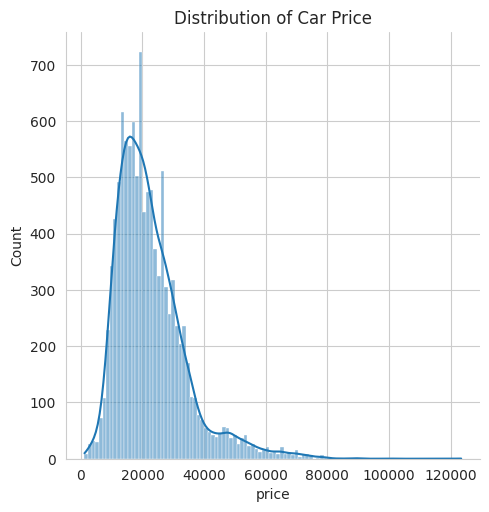

In [7]:
#Check the distribution of price
sns.displot(df['price'], kde=True)
plt.title('Distribution of Car Price')

Mostly the car price is around 20000, so the data is right-skewed

In [8]:
skewness = df['price'].skew()
skewness

np.float64(1.5868864681260946)

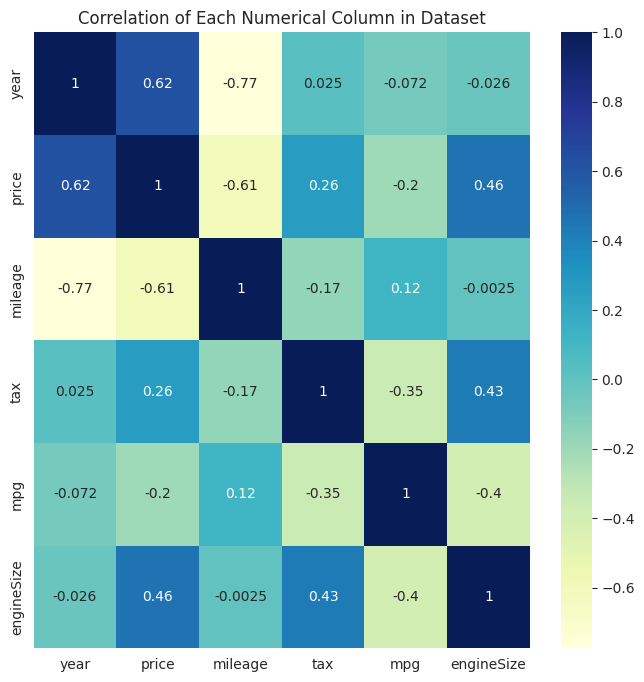

In [9]:
#Check the correlation of numerical columns
plt.figure(figsize=(8,8))
# Drop the 'model', 'transmission', and 'fuelType' columns before calculating correlation
sns.heatmap(df.drop(['model', 'transmission', 'fuelType'], axis=1).corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation of Each Numerical Column in Dataset')
plt.show() # Added plt.show() to ensure the plot is displayed

From the heatmap above, we can conclude that year and mileage have high correlation on price. Meanwhile, mileage has high negative correlation. It means that the higher the mileage, the lower the price of the car.

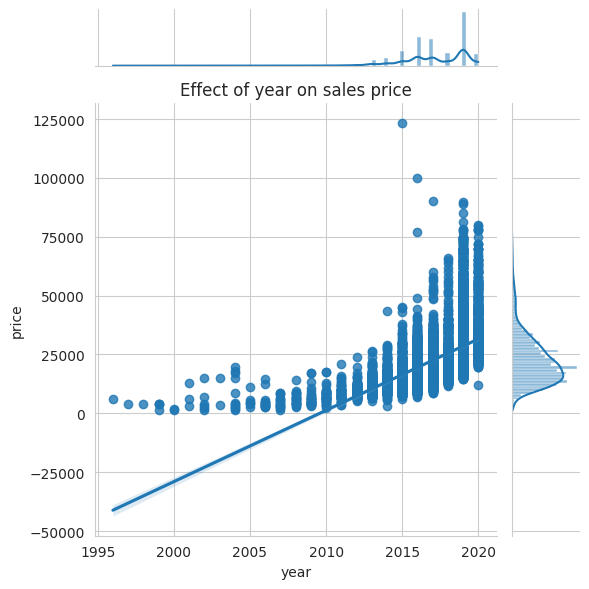

In [10]:
#Plot the effect of year on sales price
sns.jointplot(x='year', y='price', data=df, kind='reg')
plt.title('Effect of year on sales price')
plt.tight_layout()

In [11]:
#Find cars which are outliers
df[(df['price']>75000) & (df['year']<2018)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
7394,M4,2016,76990,Automatic,4550,Petrol,300,33.2,3.0


In [12]:
#Find the mean price of M4 and 2 series
M4 = round(df[df['model'].str.contains('M4')]['price'].mean(),2)
Series2 = round(df[df['model'].str.contains('2 Series')]['price'].mean(),2)
print(f"The mean price of 2 Series is {Series2} and the mean price of M4 is {M4}")

The mean price of 2 Series is 19539.37 and the mean price of M4 is 43274.23


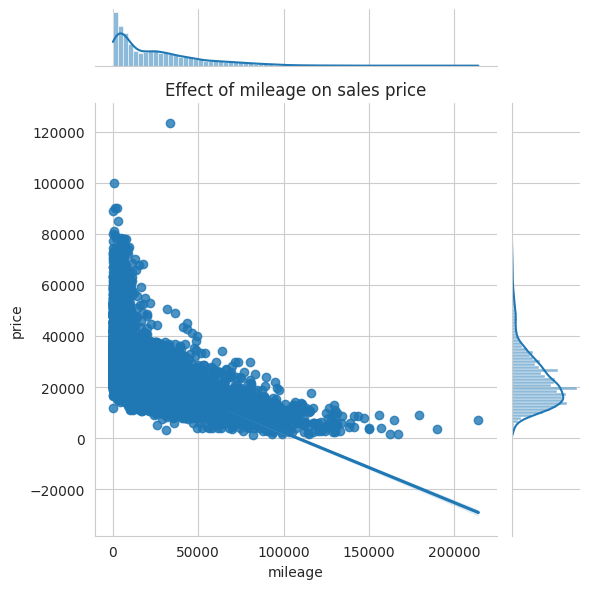

In [13]:
#Plot the effect of mileage on sales price
sns.jointplot(x='mileage', y='price', data=df, kind='reg')
plt.title('Effect of mileage on sales price')
plt.tight_layout()

In [14]:
#Check the number of cars based on model
df['model'].value_counts()

,count
model,
3 Series,2443
1 Series,1969
2 Series,1229
5 Series,1056
4 Series,995
X1,804
X3,551
X5,468
X2,288


Text(0.5, 1.0, 'Countplot of cars based on transmission')

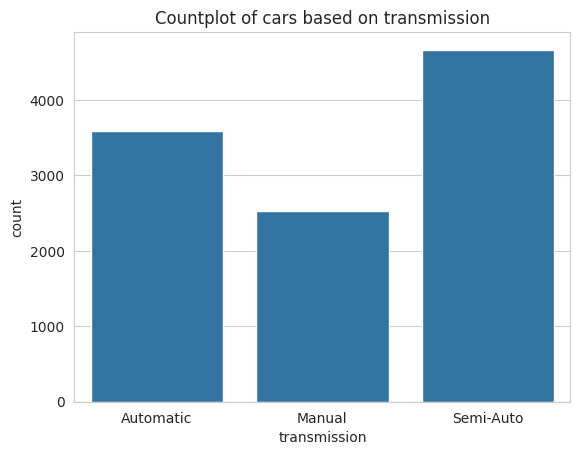

In [15]:
#Check the number of cars based on transmission
sns.countplot(x='transmission', data=df)
plt.title('Countplot of cars based on transmission')

Text(0.5, 1.0, 'Countplot of cars based on fuel type')

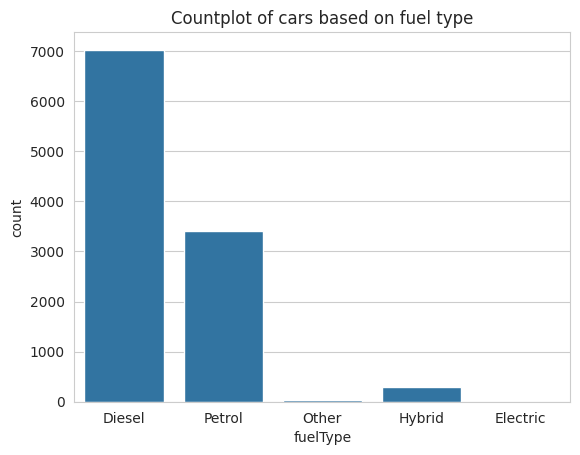

In [16]:
#Check the number of cars based on fuel type
sns.countplot(x='fuelType', data=df)
plt.title('Countplot of cars based on fuel type')

***FEATURE ENGINEERING***

Now, prepare our data to be fitted to machine learning algorithm.

In [17]:
#The price is right-skewed, use PowerTransformer to normalize the data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df['price'] = pt.fit_transform(df['price'].values.reshape(-1,1))

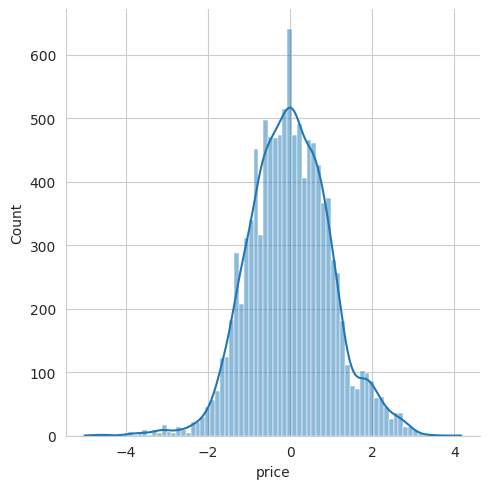

In [18]:
#Check again the distribution of the data after transformation
sns.displot(df['price'], kde=True)

Next, convert non-numerical columns into numerical columns

In [19]:
df.select_dtypes('object').columns

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [20]:
#Get dummies for transmission and fuelType column
transmission = pd.get_dummies(df['transmission'], drop_first=True)
fueltype = pd.get_dummies(df['fuelType'], drop_first=True)

In [21]:
transmission

,Manual,Semi-Auto
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10776,False,False
10777,False,False
10778,True,False
10779,False,False


In [22]:
df = pd.concat([df, transmission, fueltype], axis=1)

In [23]:
df.drop(['transmission', 'fuelType'], axis=1, inplace=True)

Now, let's convert the model column. We can separate model column into 2 columns.
1. Type column which consists model of the car such as M, i, Z, or sedan
2. Series column which consists series of the car such as 1, 3, 5, 7

In [24]:
def get_series(string):
    if '1' in string:
        return 1
    elif '2' in string:
        return 2
    elif '3' in string:
        return 3
    elif '4' in string:
        return 4
    elif '5' in string:
        return 5
    elif '6' in string:
        return 6
    elif '7' in string:
        return 7
    elif '8' in string:
        return 8

In [25]:
df['series'] = df['model'].apply(lambda x: get_series(x))

In [26]:
#Now, let-s get the type of the car based on car model
def get_type(string):
    if 'Series' in string:
        return 'S'
    elif 'X' in string:
        return 'X'
    elif 'i' in string:
        return 'i'
    elif 'Z' in string:
        return 'Z'
    elif 'M' in string:
        return 'M'

In [27]:
df['type'] = df['model'].apply(lambda x: get_type(x))

In [28]:
#Get dummy of type column
type = pd.get_dummies(df['type'], drop_first=True)

#Concat dummy with df
df = pd.concat([df,type], axis=1)

In [29]:
#Drop the model and type column
df.drop(['model', 'type'], axis=1, inplace=True)

In [30]:
df.head()

,year,price,mileage,tax,mpg,engineSize,Manual,Semi-Auto,Electric,Hybrid,Other,Petrol,series,S,X,Z,i
0,2014,-1.220522,67068,125,57.6,2.0,False,False,False,False,False,False,5,True,False,False,False
1,2018,0.575543,14827,145,42.8,2.0,False,False,False,False,False,True,6,True,False,False,False
2,2016,-0.515372,62794,160,51.4,3.0,False,False,False,False,False,False,5,True,False,False,False
3,2017,-0.967767,26676,145,72.4,1.5,False,False,False,False,False,False,1,True,False,False,False
4,2014,-0.713028,39554,160,50.4,3.0,False,False,False,False,False,False,7,True,False,False,False


In [31]:
#Check again if each column is numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10781 non-null  int64  
 1   price       10781 non-null  float64
 2   mileage     10781 non-null  int64  
 3   tax         10781 non-null  int64  
 4   mpg         10781 non-null  float64
 5   engineSize  10781 non-null  float64
 6   Manual      10781 non-null  bool   
 7   Semi-Auto   10781 non-null  bool   
 8   Electric    10781 non-null  bool   
 9   Hybrid      10781 non-null  bool   
 10  Other       10781 non-null  bool   
 11  Petrol      10781 non-null  bool   
 12  series      10781 non-null  int64  
 13  S           10781 non-null  bool   
 14  X           10781 non-null  bool   
 15  Z           10781 non-null  bool   
 16  i           10781 non-null  bool   
dtypes: bool(10), float64(3), int64(4)
memory usage: 695.0 KB


SPLIT THE DATA INTO TRAINING AND TESTING DATA

X is for features <br />
y is for target to predict, which is price column

In [32]:
#Set X and y
X = df.drop('price', axis=1)
y = df['price']

In [33]:
#Split data into training and testing data, set test size = 40% of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

DEFINE MODEL EVALUATION

In [34]:
#def function for scoring model
#Use RMSE for scoring model
def rmse(y_test, y_predict):
    MSE = np.mean((y_test - y_predict)**2)
    return np.sqrt(MSE)

#Plot the predicted value with real value
def plot_result(y_test, y_predict):
    sns.scatterplot(x=y_test, y=y_predict)
    plt.xlabel('true price')
    plt.ylabel('predicted price')

#def for scoring the coefficient of determination or R^2
def r_square(model):
    return model.score(X_test, y_test)

RANDOM FOREST REGRESSION

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features='sqrt',n_estimators=800,min_samples_leaf=1)

In [36]:
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

Text(0.5, 1.0, 'True vs Predicted Price (Random Forest Regression)')

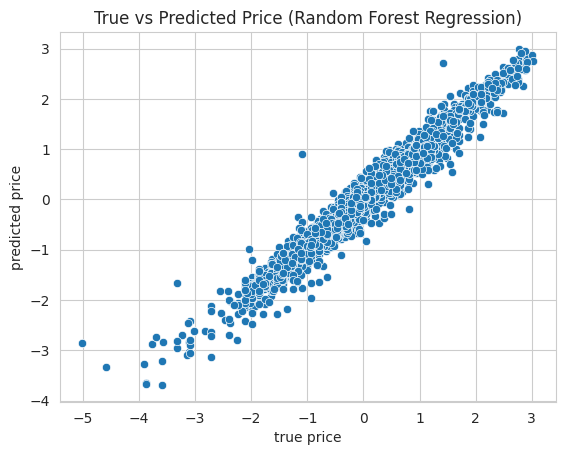

In [37]:
#Plot the predicted value with real value
plot_result(y_test, rf_predict)
plt.title('True vs Predicted Price (Random Forest Regression)')

Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(max_features='sqrt', loss='squared_error',learning_rate=0.01,max_depth=8,min_samples_leaf=5,min_samples_split=15,n_estimators=3000)

In [39]:
GBoost.fit(X_train,y_train)
gb_predict = GBoost.predict(X_test)

Text(0.5, 1.0, 'True vs Predicted Price (Gradient Boosting Regression)')

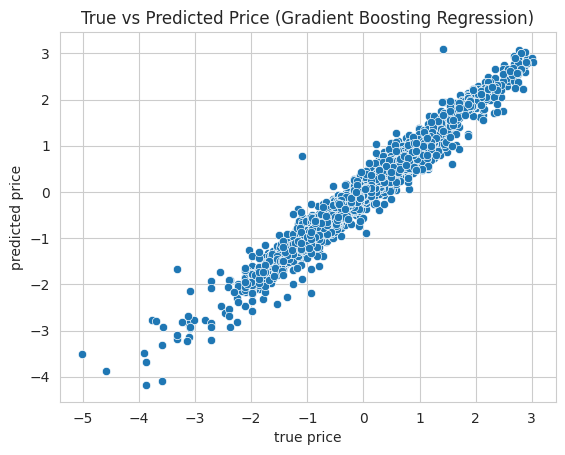

In [40]:
#Plot the predicted value with real value
plot_result(y_test, gb_predict)
plt.title('True vs Predicted Price (Gradient Boosting Regression)')

MODEL RESULTS SUMMARY

In [41]:
# Calculate and print RMSE for Random Forest
rf_rmse = rmse(y_test, rf_predict)
print(f"Random Forest RMSE: {rf_rmse}")

# Calculate and print R-squared for Random Forest
rf_r_square = r_square(rf)
print(f"Random Forest R-squared: {rf_r_square}")

# Calculate and print RMSE for Gradient Boosting
gb_rmse = rmse(y_test, gb_predict)
print(f"Gradient Boosting RMSE: {gb_rmse}")

# Calculate and print R-squared for Gradient Boosting
gb_r_square = r_square(GBoost)
print(f"Gradient Boosting R-squared: {gb_r_square}")

Random Forest RMSE: 0.19908065297280286
Random Forest R-squared: 0.9595438790805302
Gradient Boosting RMSE: 0.1910567443394339
Gradient Boosting R-squared: 0.9627393118367702


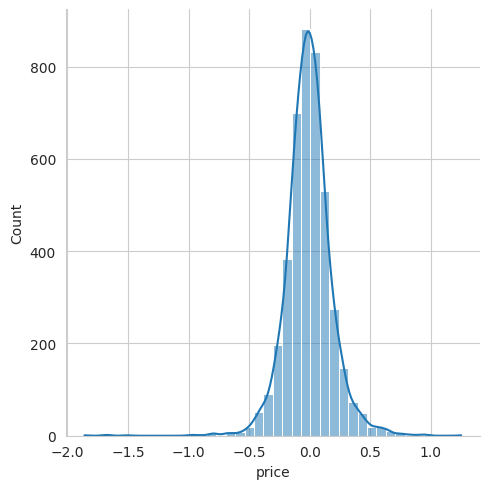

In [42]:
#Check the residual of gradient boosting if it is normally distributed
residual = y_test - gb_predict
sns.displot(residual, bins=40, kde=True)

In [45]:
import joblib

# Save model and transformer
joblib.dump(GBoost, "gradient_boosting_regression_model.pkl")
joblib.dump(pt, "price_transformer.pkl")

['price_transformer.pkl']